Entrega tarea semana 3 - Actividad 1.

**Nombre:** Enrique Ricardo García Hernández

**Matrícula:** A01315428

**Materia:** Ciencia y Analítica de datos

**Profesor:** Jobish Vallikavungal Devassia

**Fecha:** 04 de octubre 2020

**1.- Fundamentos de bases de datos para la ciencia de datos.**

La mayoria de la información está almacenada en bases de datos, ya sea del tipo estructurada, no estructurada o semi-estructurada. El conocer dónde está almacenada, como los datos stán vinculados entre las diversas plataformas de las compañías que conforman en ecosistema tecnológico, permite al analista de datos, el ingeniero y científico de datos, así como al tomador de decisiones hacer que la compañía sea *data driven organization*

El equipo de Analítica y Ciencia de datos deberá:
- Poder darle trazabilidad punta a punta a la historia basada en datos (data story telling);
- Comunicar en forma eficiente concepto / hallazgos complejos en foros de profesionales de diferentes tipos de formación y/o rol dentro de la compañía.

Las bases de datos deberan de tener:
- Tablas y regitros;
- Información estructurada y relacionada en forma lógica para su trazabilidad;
- Diccionario o catálogo con la descripción y naturaleza de los campos;
- Redundancia, integridad y calidad; y
- Gobierno y definición roles y responsabilidades del dueño de los datos.

**2.- Fundamentos de almacenes de datos (Data Warehouse) para ciencia de datos.**
El data warehouse como receptáculo de la información de las diferents fuentes del ecosistema tecnológico de la compañía, mediante el uso de herramientas y softwares de extracción, transformación y carga de información entre los sistemas operativos y las bases de datos institucionales y explotables de la compañía por los diferentes equipos analíticos de datos.

Dentro del gran compendio o almacen de datos de la compañía, se pueden generar *data marts* especializados para cada una de las unidades de negocios, en el caso de la financiera donde actualmene trabajo, contamos con un lago de datos en donde vive la información cruda de la compañía (información sin ningún proceso de validación y/o estructuración), además mediante ETLs tenemos el data mart de Riesgos con información a T-1, contamos con toda la transaccionalidad, seguimientos e interacciones de queries del CRM, proceso de originación, administración, gestión y cobranza, siendo el data mart el receptáculo que usamos para la generación de análisis recurrentes o ad-hoc de la compañía mediante el usos de softwares como SAS, Tableau (para reportear), Python y R

In [70]:
#Mandar llamar las librerías que vamos a utilizar en este ejercicio
import pandas as pd
import numpy as np

In [134]:
url = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
datos = pd.read_csv(url,index_col=0,sep=",") #El código identificador está en la primera columna, la variable a predecir es "Y" (paga o no paga el crédito)

In [135]:
#Renombrando las variables
datos.rename(columns = {'X1':'Monto_prestamo', 'X2': 'Género', 'X3':'Educacion', 'X4':'Edo_Civil','X5':'Edad','X6':'Status_pago_sep05','X7':'Status_pago_ago05','X8':'Status_pago_jul05','X9':'Status_pago_jun05',
'X10':'Status_pago_may05','X11':'Status_pago_abr05','X12':'Monto_exig_sep05','X13':'Monto_exig_ago5','X14':'Monto_exig_jul05','X15':'Monto_exig_jun05','X16':'Monto_exig_may05','X17':'Monto_exig_abr05',
'X18':'Monto_pagado_sep05','X19':'Monto_exig_ago05','X20':'Monto_exig_jul05','X21':'Monto_exig_jun05','X22':'Monto_exig_may05','X23':'Monto_exig_abr05'}, inplace = True)
datos.head()

,Monto_prestamo,Género,Educacion,Edo_Civil,Edad,Status_pago_sep05,Status_pago_ago05,Status_pago_jul05,Status_pago_jun05,Status_pago_may05,...,Monto_exig_jun05,Monto_exig_may05,Monto_exig_abr05,Monto_pagado_sep05,Monto_exig_ago05,Monto_exig_jul05,Monto_exig_jun05,Monto_exig_may05,Monto_exig_abr05,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [136]:
#Validando la dimensión de la base de datos ==> 30 mil registros con 24 variables
datos.shape

(30000, 24)

In [137]:
datos.describe()

,Monto_prestamo,Género,Educacion,Edo_Civil,Edad,Status_pago_sep05,Status_pago_ago05,Status_pago_jul05,Status_pago_jun05,Status_pago_may05,...,Monto_exig_jun05,Monto_exig_may05,Monto_exig_abr05,Monto_pagado_sep05,Monto_exig_ago05,Monto_exig_jul05,Monto_exig_jun05,Monto_exig_may05,Monto_exig_abr05,Y
count,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,1.133296,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [138]:
datos.isna().any()
#Revisamos si alguna variable tiene valores Nulo / faltantes y todas excepto X1 tienen al menos 1 valor faltante, incluyendo la variable a predecir que es Y

Monto_prestamo        False
Género                 True
Educacion              True
Edo_Civil              True
Edad                   True
Status_pago_sep05      True
Status_pago_ago05      True
Status_pago_jul05      True
Status_pago_jun05      True
Status_pago_may05      True
Status_pago_abr05      True
Monto_exig_sep05       True
Monto_exig_ago5        True
Monto_exig_jul05       True
Monto_exig_jun05       True
Monto_exig_may05       True
Monto_exig_abr05       True
Monto_pagado_sep05     True
Monto_exig_ago05       True
Monto_exig_jul05       True
Monto_exig_jun05       True
Monto_exig_may05       True
Monto_exig_abr05       True
Y                      True
dtype: bool

In [139]:
#Descartando las observaciones con al menos un valor faltante
#Se eliminaron 42 observaciones que tenían al menos 1 datos faltante ==> se eliminó el 0.14% de la base de datos ==> Podemos vivir con eso
datos.dropna(inplace = True)
datos.shape

(29958, 24)

In [140]:
#Algunos estadísticos descriptivos para variables de naturaleza numérica, ejemplo: Monto del préstamo

In [141]:
datos.Monto_prestamo.describe()

count      29958.000000
mean      167555.900928
std       129737.299088
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: Monto_prestamo, dtype: float64

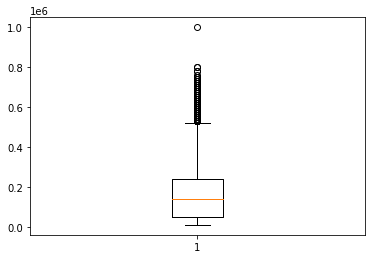

In [157]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize =(10, 7))
 
# Creando box-plot para la variable Monto préstamo
plt.boxplot(datos.Monto_prestamo)
 
# show plot
plt.show()

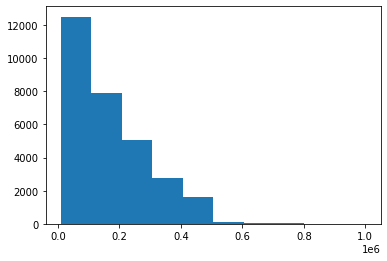

In [161]:
#Histograma de la variable Monto_prestamo
plt.hist(datos.Monto_prestamo,bins=10)
plt.show()

In [142]:
datos.Y.describe() #Tasa de impago ~ 22%

count    29958.000000
mean         0.221143
std          0.415023
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Y, dtype: float64

In [143]:
datos['Género'].value_counts()/datos.shape[0] #Casi el 40% de la población son hombres

2.0    0.604012
1.0    0.395988
Name: Género, dtype: float64

In [93]:
datos['Educacion'].value_counts()/datos.shape[0]
#~80% cuentan con estudios al menos universitarios (esta variable en su momento la podríamos agrupar),
#así como entender algunos valores como 5,6 y 0 ya que no están considerados en el catálogo de datos

2.0    0.467621
1.0    0.352894
3.0    0.163863
5.0    0.009346
4.0    0.004106
6.0    0.001702
0.0    0.000467
Name: Educacion, dtype: float64

In [105]:
datos['Edo_Civil'].value_counts()/datos.shape[0] #Entender los valores 0, hacemos un ejercicio de agrupación para eliminar ruido

2.0    0.532133
1.0    0.455233
3.0    0.010767
0.0    0.001800
Name: Edo_Civil, dtype: float64

In [144]:
datos['Edo_Civil'] = datos['Edo_Civil'].map({2:2, 1:1, 3:3,0:3}) #En este caso los valores originales de Edo_Civil=0 se sustituiran con el valor 3 que es "Otros"
datos['Edo_Civil'].value_counts()/datos.shape[0]

2    0.532045
1    0.455404
3    0.012551
Name: Edo_Civil, dtype: float64

**¿Qué datos considero mas importantes? ¿Por qué?**
- Con base en la explicación del catálogo, es un modelo que buscará predecir la probabilidad de incumplimiento, intuitivamente las variables transaccionales y en menor medida las socio demográficas aportarán algún valor de predictibilidad


**¿Se eliminaron o reemplazaron datos nulos? ¿Qué se hizo y por qué?**
- La base de datos original tiene 30 mil regitros, eliminando todas aquellos registros que contengan al menos 1 valor nulo estaríamos perdiendo 44 registros que es menos del 0.5% de la muestra, por lo tanto se eliminaron para este caso en particular.

**¿Es necesario limpiar los datos para el análisis? Sí / No / ¿Por qué?**
Sí, al realizar un primer análisis exploratorio para familiarizarnos con la base de datos encontramos evidencia que de acuerdo al catálogo de datos hay algunos valores que aparecen en la base de datos que no están considerados en el catálogo, ejemplo para la variable estado civil, la base de datos tiene valores con "0" con 4 observaciones, dicho valor NO está declarado en el diccionario que se nos compartió

**¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.**
Parecería que NO existen problemas mayores de formato, después de poder identificar las variables numéricas nominales y las variables ordinales

**¿Qué ajustes se realizaron en el proceso de limpieza de datos (agregar, integrar, eliminar, modificar registros (filas), cambiar atributos (columnas)?**

1.   Se eliminar 42 registros (~0.14% de la base de datos por contar con al menos missing
2.   Para los registros completos, algunos valores se agruparon con "otros" dado que no estaban definidos en el catálogo enviado
3.   Para algunas variables numéricas revisar si los valores capturados son atípicos para realizar alguna corrección o evaluar eliminar / acotar lo largo de las colas de distribución
